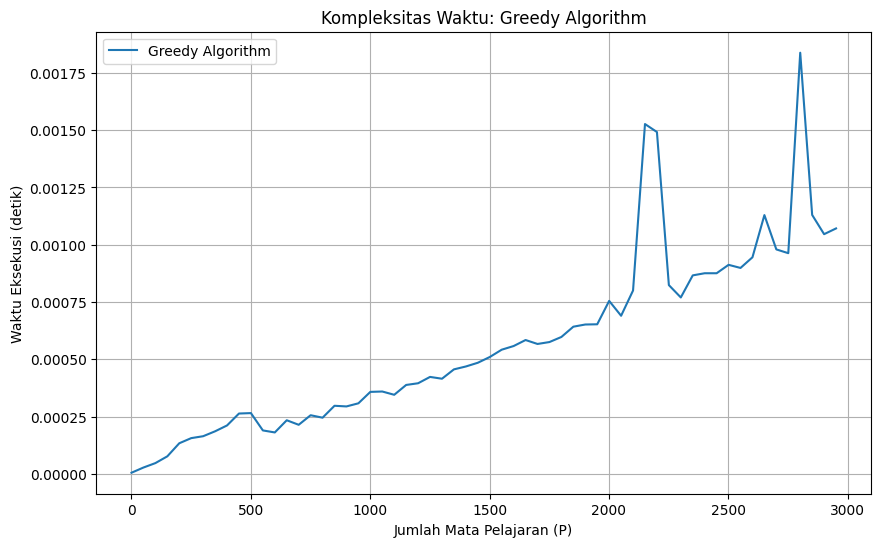

In [ ]:
import time
import matplotlib.pyplot as plt

# Greedy Algorithm
def schedule_study_greedy(subjects, available_time):
    subjects.sort(key=lambda x: x['satisfaction'] / x['time'], reverse=True)  # Sorting subjects by satisfaction per unit time
    total_satisfaction = 0
    total_time = 0

    for subject in subjects:
        if total_time + subject['time'] <= available_time:
            total_time += subject['time']
            total_satisfaction += subject['satisfaction']
        else:
            break

    return total_satisfaction

# Fungsi untuk mengukur kompleksitas waktu Greedy Algorithm
def measure_time_greedy(subjects, available_time):
    start_time = time.time()
    schedule_study_greedy(subjects, available_time)
    end_time = time.time()
    return end_time - start_time

# Ukuran masukan (jumlah mata pelajaran)
input_sizes = list(range(1,3001, 50))  # Mulai dari 1 hingga 3000 dengan interval 50

# Inisialisasi list untuk menyimpan waktu eksekusi
execution_times_greedy = []

# Pengukuran waktu eksekusi untuk setiap ukuran masukan
for size in input_sizes:
    subjects = [{'name': f'Subject {i}', 'time': 1, 'satisfaction': 1} for i in range(size)]
    available_time = size  # Total waktu belajar diset sama dengan jumlah mata pelajaran

    execution_time_greedy = measure_time_greedy(subjects, available_time)
    execution_times_greedy.append(execution_time_greedy)

# Plot grafik
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, execution_times_greedy, label='Greedy Algorithm')
plt.xlabel('Jumlah Mata Pelajaran (P)')
plt.ylabel('Waktu Eksekusi (detik)')
plt.title('Kompleksitas Waktu: Greedy Algorithm')
plt.legend()
plt.grid(True)
plt.show()

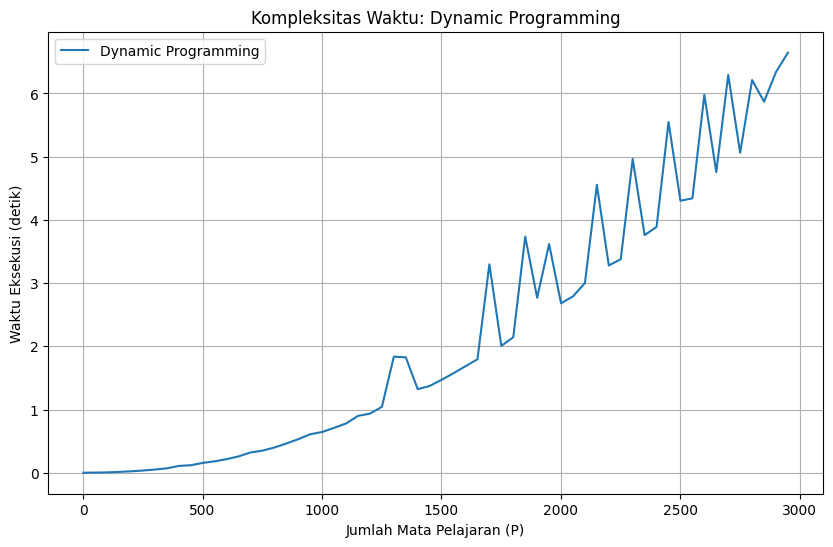

In [ ]:
import time
import matplotlib.pyplot as plt

# Dynamic Programming
def schedule_study_dp(subjects, available_time):
    n = len(subjects)
    dp = [[0] * (available_time + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for w in range(1, available_time + 1):
            if subjects[i-1]['time'] <= w:
                dp[i][w] = max(dp[i-1][w], dp[i-1][w - subjects[i-1]['time']] + subjects[i-1]['satisfaction'])
            else:
                dp[i][w] = dp[i-1][w]

    return dp[n][available_time]

# Fungsi untuk mengukur kompleksitas waktu Dynamic Programming
def measure_time_dp(subjects, available_time):
    start_time = time.time()
    schedule_study_dp(subjects, available_time)
    end_time = time.time()
    return end_time - start_time

# Ukuran masukan (jumlah mata pelajaran)
input_sizes = list(range(1, 3001, 50))  # Mulai dari 1 hingga 3000 dengan interval 50

# Inisialisasi list untuk menyimpan waktu eksekusi
execution_times_dp = []

# Pengukuran waktu eksekusi untuk setiap ukuran masukan
for size in input_sizes:
    subjects = [{'name': f'Subject {i}', 'time': 1, 'satisfaction': 1} for i in range(size)]
    available_time = size  # Total waktu belajar diset sama dengan jumlah mata pelajaran

    execution_time_dp = measure_time_dp(subjects, available_time)
    execution_times_dp.append(execution_time_dp)

# Plot grafik
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, execution_times_dp, label='Dynamic Programming')
plt.xlabel('Jumlah Mata Pelajaran (P)')
plt.ylabel('Waktu Eksekusi (detik)')
plt.title('Kompleksitas Waktu: Dynamic Programming')
plt.legend()
plt.grid(True)
plt.show()